## Linear regression has been implimented considering ""no_of_days_subscribed"" as the output

#### Library Importing: First, the relevant libraries are imported

In [ ]:
!pip install matplotlib -q
!pip install numpy -q
!pip install pandas -q
!pip install scikit_learn -q
!pip install seaborn -q
!pip install torch -q
!pip install torchvision -q


In [ ]:
!pip install seaborn

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Data Importing: CSV file is uploaded using pandas library

In [ ]:
#reading data
df = pd.read_csv("/content/data.csv")

#### Data Exploration: dimension of the data is seen and the oputput column is checked to see that it is continous or  discrete. Here, we will consider  ""no_of_days_subscribed"" as the output variable so regression model will be applied

In [ ]:
df.shape

(2000, 16)

In [ ]:
df.tail(8)  # Visualizing some of the rows of our data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [ ]:
df = df.drop(["year", "customer_id", "phone_no"], axis=1) # removing the unwanted features

In [ ]:
print(df.shape)         # Lookiing the shape of the data

(2000, 13)


In [ ]:
print(df.columns)       # Looking how many columns data has

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')


In [ ]:
df.dtypes               # Looing the type of data each column consists of

gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

##### Null Value Treatment: If we have null values then we need to work on that before feeding it to our model

In [ ]:
#checking null values in data
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
df1 = df.dropna()         # Dropping the null values
df1.head(5)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df1.isnull().sum()        #Looking the total null values again just in case

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [ ]:
df1.shape #shape of the data

(1918, 13)

In [ ]:
df1[['gender', 'multi_screen', 'mail_subscribed']]

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no
...,...,...,...
1990,Male,no,no
1991,Male,yes,yes
1992,Female,no,yes
1996,Male,no,no


#### Before feeding this to the model we need to encode the categroical variables

In [ ]:
#label encoding categorical features
label_encoder = preprocessing.LabelEncoder()
df1['gender']= label_encoder.fit_transform(df1['gender'])
df1['multi_screen']= label_encoder.fit_transform(df1['multi_screen'])
df1['mail_subscribed']= label_encoder.fit_transform(df1['mail_subscribed'])

In [ ]:
df1.head(4)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0


#### Let us use all the independent column for feeding the model for training by keeping it into separate dataframe

In [ ]:
x = df1.drop("no_of_days_subscribed", axis=1)
X = pd.DataFrame(x)

In [ ]:
X

,gender,age,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1,32,0,0,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,1,49,1,1,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,0,42,0,1,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,1,45,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0


#### This X will be fed to the model to learn params using columns:
#### "age", , "weekly_mins_watched", maximum_daily_mins, "weekly_max_night_mins", "videos_watched", "maximum_days_inactive", "customer_support_calls"

In [ ]:
X.tail(4)

,gender,age,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1991,1,49,1,1,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,0,42,0,1,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,1,45,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1999,1,37,0,0,326.70,10.3,37.03,89,6,3.0,1,1.0


#### In the above dataframe we can see that we have values in different range in different columns. So, scaling can be done so as to get a better results. Here, Standard scaling has been used which bring the mean value to zero and standard deviation to one.

In [ ]:
#scaling data
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

In [ ]:
X

array([[ 0.        , -0.27685547,  0.        , ...,  0.11111111,
         0.01234568,  0.        ],
       [ 0.        , -0.27612305,  0.        , ...,  0.08333333,
         0.02469136,  0.        ],
       [ 0.        , -0.26977539,  0.        , ...,  0.11111111,
         0.0617284 ,  1.        ],
       ...,
       [ 0.        , -0.27539062,  0.        , ...,  0.08333333,
         0.03703704,  0.        ],
       [ 1.        , -0.2746582 ,  0.        , ...,  0.08333333,
         0.01234568,  0.        ],
       [ 1.        , -0.27661133,  0.        , ...,  0.08333333,
         0.01234568,  1.        ]])

In [ ]:
X.shape

(1918, 12)

In [ ]:
n_samples, n_features = X.shape   # Storing the values in two parts as it will easy later to feed the model

#### Keeping the output column in a separate dataframe

In [ ]:
Y = df1["no_of_days_subscribed"]         # no_of_days_subscribed
Y.tail(10)

1985     73
1986     42
1987    157
1988    133
1989    144
1990     61
1991     50
1992    119
1996    127
1999     73
Name: no_of_days_subscribed, dtype: int64

#### Let's plot the distribution of the Y data points so that we can have an idea of how the data spreads over a space. We can see that the plot is almost normaly distributed so hopefully better accuracy can be achieved

<Axes: xlabel='no_of_days_subscribed', ylabel='Density'>

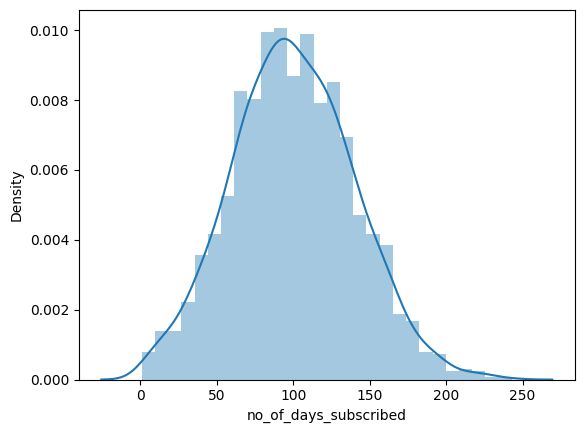

In [ ]:
sns.distplot(Y)

#### Data Splitting: The data is processesed so now we can split the data in train and test so as to train the model with training data and test it later from testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(type(y_train.values))
print(type(y_test.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# X_train = pd.DataFrame.to_numpy(X_train)
# X_test = pd.DataFrame.to_numpy(X_test)
# y_train = pd.DataFrame.to_numpy(y_train.values)
# y_test = pd.DataFrame.to_numpy(y_test.values)

# print(type(y_test))
# print(type(y_train))
# print(type(X_test))
# print(type(X_test))

#### Now we will convert all of them to the tensor as PyTorch works on Tensor

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

In [ ]:
X_train.dtype
X_test.dtype

torch.float32

In [ ]:
print(y_train.dtype)
print(y_test.dtype)

torch.float32
torch.float32


#### Making output vector Y as a column vector for matrix multiplications

In [ ]:
y_train.shape[0]

1438

In [ ]:
y_train.view(y_train.shape[0], 1)

tensor([[ 90.],
        [ 93.],
        [181.],
        ...,
        [126.],
        [112.],
        [117.]])

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### Model Building: Creating Linear Regression model in Pytorch


#### Linear Regression is a Linear model so we will use Pytorch's [nn.Linear] module which is used for performing linear operations  for making a linear decision boundary.


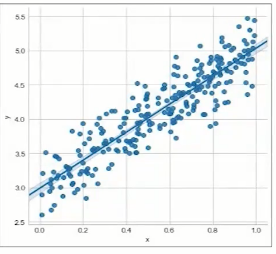

In [ ]:
in_dimn = n_features     # its 12 our case
out_dimn = 1             # in our case 1

In [ ]:
# Creating the model in PyTorch

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, in_dimn, out_dimn):
        super(LinearRegressionModel,self).__init__()
        self.model = torch.nn.Linear(in_dimn, out_dimn)
    def forward(self,x):
        y_pred=self.model(x);
        return y_pred

model=LinearRegressionModel(in_dimn, out_dimn) #Instantiating the model

In [ ]:
model

LinearRegressionModel(
  (model): Linear(in_features=12, out_features=1, bias=True)
)

#### Model Parameters: Lets see the parameters the model has and we can see that we have 8 eights input features which are the columns we provided and 1 output parameter which will store the numeric data we finally get.

In [ ]:
model.parameters

<bound method Module.parameters of LinearRegressionModel(
  (model): Linear(in_features=12, out_features=1, bias=True)
)>

####  Compiling Model: Let us define the number of epochs and the learning rate we want for our model to train. As our data is continous so we need to define a loss function for numerical data, Mean Squared Error loss function has been taken in this work. Now the second step will be to use an Optimizer for finding the Global Minima, here Stocahstic Gradiant Descent has been used.


In [ ]:
num_epochs = 1000
# Traning the model for large number of epochs to see better results
learning_rate = 0.01
criterion = nn.MSELoss()
# It's Linear Regression so use Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Using SGD optimizer to find local minima

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Visualizing the training process of the model by printing the epochs to see how the error is decreasing

In [ ]:
X_train

tensor([[ 0.0000, -0.2771,  0.0000,  ...,  0.1111,  0.0123,  0.0000],
        [ 0.0000, -0.2764,  0.0000,  ...,  0.1111,  0.0123,  0.0000],
        [ 0.0000, -0.2754,  0.0000,  ...,  0.0556,  0.0123,  0.0000],
        ...,
        [ 0.0000, -0.2761,  0.0000,  ...,  0.0833,  0.0247,  0.0000],
        [ 1.0000, -0.2734,  0.0000,  ...,  0.1111,  0.0000,  0.0000],
        [ 1.0000, -0.2720,  1.0000,  ...,  0.0833,  0.0123,  1.0000]])

In [ ]:
# Using SGD optimizer to find local minima

num_epochs = 1000
# Traning the model for large number of epochs to see better results
learning_rate = 0.1
learning_rate = 0.01
criterion = nn.MSELoss()
# It's Linear Regression so use Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Using SGD optimizer to find local minima

for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()     # Lets clear the gradiants
    if (epoch+1) % 30 == 0:
        # printing loss values on every 30 epochs to keep track
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 30, loss = 1598.7562
epoch: 60, loss = 1598.7559
epoch: 90, loss = 1598.7556
epoch: 120, loss = 1598.7552
epoch: 150, loss = 1598.7550
epoch: 180, loss = 1598.7549
epoch: 210, loss = 1598.7545
epoch: 240, loss = 1598.7544
epoch: 270, loss = 1598.7542
epoch: 300, loss = 1598.7538
epoch: 330, loss = 1598.7537
epoch: 360, loss = 1598.7533
epoch: 390, loss = 1598.7532
epoch: 420, loss = 1598.7528
epoch: 450, loss = 1598.7524
epoch: 480, loss = 1598.7523
epoch: 510, loss = 1598.7521
epoch: 540, loss = 1598.7517
epoch: 570, loss = 1598.7513
epoch: 600, loss = 1598.7512
epoch: 630, loss = 1598.7512
epoch: 660, loss = 1598.7507
epoch: 690, loss = 1598.7505
epoch: 720, loss = 1598.7504
epoch: 750, loss = 1598.7500
epoch: 780, loss = 1598.7499
epoch: 810, loss = 1598.7495
epoch: 840, loss = 1598.7493
epoch: 870, loss = 1598.7489
epoch: 900, loss = 1598.7488
epoch: 930, loss = 1598.7487
epoch: 960, loss = 1598.7483
epoch: 990, loss = 1598.7480


In [ ]:
# with SGD optimizer

# Detaching the output from the computational graph and converting to numpy
y_pred = model(X_test).detach().numpy()
# y_pred

In [ ]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, y_pred)

-0.001714206691386888

In [ ]:
# Using Adam optimizer to find local minima


num_epochs = 1000
# Traning the model for large number of epochs to see better results
learning_rate = 0.01
criterion = nn.MSELoss()
# It's Linear Regression so use Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()     # Lets clear the gradiants
    if (epoch+1) % 30 == 0:
        # printing loss values on every 30 epochs to keep track
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 30, loss = 11600.1123
epoch: 60, loss = 11434.1484
epoch: 90, loss = 11270.4102
epoch: 120, loss = 11108.8945
epoch: 150, loss = 10949.5801
epoch: 180, loss = 10792.4443
epoch: 210, loss = 10637.4600
epoch: 240, loss = 10484.6104
epoch: 270, loss = 10333.8662
epoch: 300, loss = 10185.2061
epoch: 330, loss = 10038.6104
epoch: 360, loss = 9894.0566
epoch: 390, loss = 9751.5205
epoch: 420, loss = 9610.9824
epoch: 450, loss = 9472.4209
epoch: 480, loss = 9335.8154
epoch: 510, loss = 9201.1436
epoch: 540, loss = 9068.3867
epoch: 570, loss = 8937.5225
epoch: 600, loss = 8808.5342
epoch: 630, loss = 8681.3975
epoch: 660, loss = 8556.0977
epoch: 690, loss = 8432.6123
epoch: 720, loss = 8310.9238
epoch: 750, loss = 8191.0127
epoch: 780, loss = 8072.8604
epoch: 810, loss = 7956.4478
epoch: 840, loss = 7841.7588
epoch: 870, loss = 7728.7720
epoch: 900, loss = 7617.4727
epoch: 930, loss = 7507.8428
epoch: 960, loss = 7399.8638
epoch: 990, loss = 7293.5181


In [ ]:
# with Adam optimizer

# Detaching the output from the computational graph and converting to numpy
y_pred = model(X_test).detach().numpy()

#### Metric for visualizing Error: Let us see the r2 error, the best score is 1 and it can be negative or positive.

In [ ]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, y_pred)

-3.4025126992269064

#### Let us see how the distribution of what model predicts and what it was given to the data

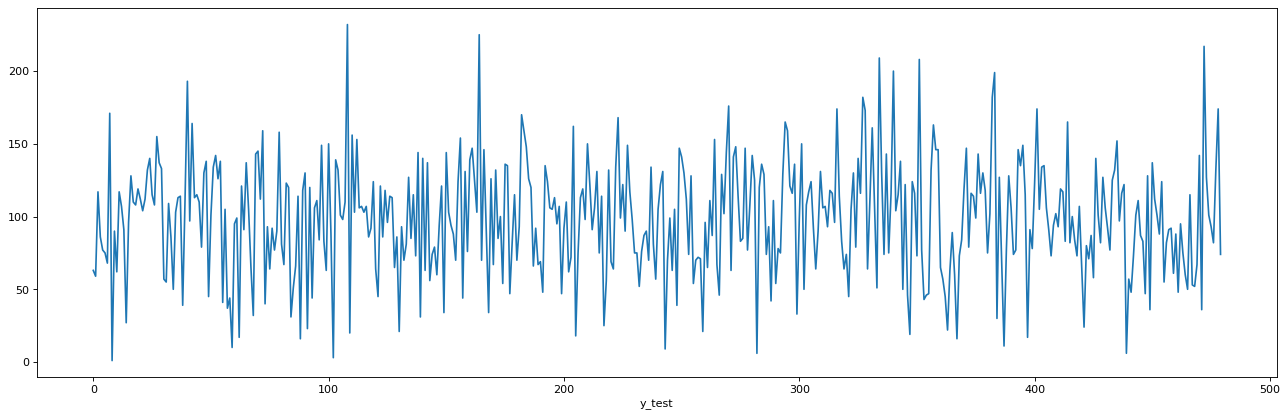

In [ ]:
# plt.scatter(y_test,y_pred, color="red")

from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
plt.plot(y_test)
plt.xlabel("y_test")


plt.show()

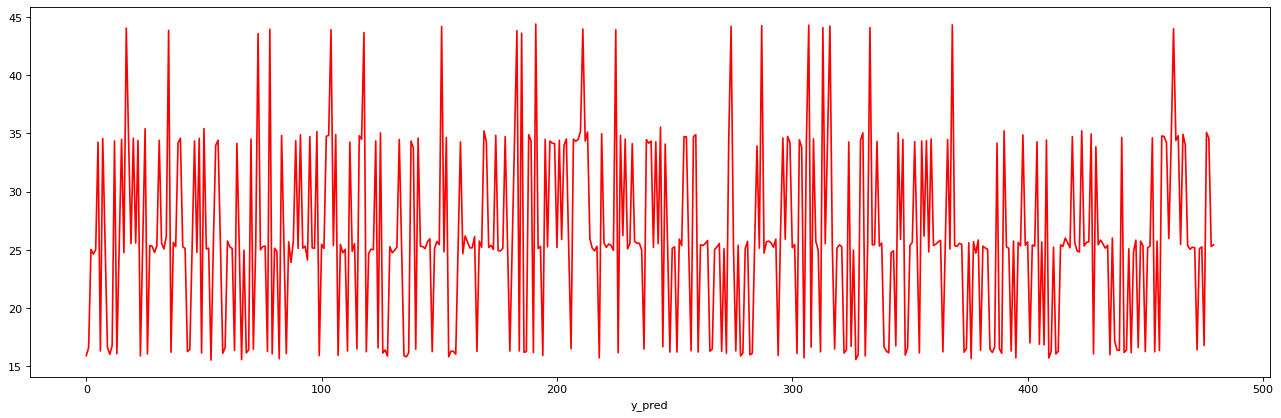

In [ ]:
figure(figsize=(20, 6), dpi=80)
plt.plot(y_pred, color="red")
plt.xlabel("y_pred")
plt.show()